In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

In [ ]:
dirname = '/content/drive/MyDrive/Colab_Notebooks/Thesis/'
cleanedData_01 = pd.read_csv(dirname + 'cleanedData_01.csv')
cleanedData_01.head()

,iid,gender,pid,match,samerace,age_o,dec_o,age,field_cd,undergra,...,concerts,music,shopping,yoga,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,dec
0,1,0,11.0,0,0,27.0,0,21.0,1,NaN,...,10.0,9.0,8.0,1.0,6.0,8.0,8.0,8.0,7.0,1
1,1,0,12.0,0,0,22.0,0,21.0,1,NaN,...,10.0,9.0,8.0,1.0,6.0,8.0,8.0,8.0,7.0,1
2,1,0,13.0,1,1,22.0,1,21.0,1,NaN,...,10.0,9.0,8.0,1.0,6.0,8.0,8.0,8.0,7.0,1
3,1,0,14.0,1,0,23.0,1,21.0,1,NaN,...,10.0,9.0,8.0,1.0,6.0,8.0,8.0,8.0,7.0,1
4,1,0,15.0,1,0,24.0,1,21.0,1,NaN,...,10.0,9.0,8.0,1.0,6.0,8.0,8.0,8.0,7.0,1


In [ ]:
cleanedData_01.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid       8378 non-null   int64  
 1   gender    8378 non-null   int64  
 2   pid       8368 non-null   float64
 3   match     8378 non-null   int64  
 4   samerace  8378 non-null   int64  
 5   age_o     8274 non-null   float64
 6   dec_o     8378 non-null   int64  
 7   age       8283 non-null   float64
 8   field_cd  8378 non-null   int64  
 9   undergra  4914 non-null   object 
 10  imprace   8299 non-null   float64
 11  from      8299 non-null   object 
 12  income    4279 non-null   float64
 13  career_c  8378 non-null   int64  
 14  sports    8299 non-null   float64
 15  tvsports  8299 non-null   float64
 16  exercise  8299 non-null   float64
 17  dining    8299 non-null   float64
 18  museums   8299 non-null   float64
 19  art       8299 non-null   float64
 20  hiking    8299 non-null   floa

## Outlier

In [ ]:
cleanedData_01.loc[cleanedData_01['gaming'] > 10, 'gaming'] = pd.NA
cleanedData_01.loc[cleanedData_01['reading'] > 10, 'reading'] = pd.NA

## Missing Value

In [ ]:
cleanedData_01.loc[cleanedData_01['pid'].isna(), :]

,iid,gender,pid,match,samerace,age_o,dec_o,age,field_cd,undergra,...,concerts,music,shopping,yoga,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,dec
1755,122,1,NaN,0,0,NaN,0,22.0,1,NaN,...,8.0,8.0,5.0,4.0,7.0,10.0,8.0,8.0,8.0,0
1765,123,1,NaN,0,0,NaN,0,18.0,5,NaN,...,7.0,7.0,7.0,5.0,8.0,7.0,7.0,7.0,8.0,0
1775,124,1,NaN,0,0,NaN,0,22.0,8,NaN,...,9.0,8.0,8.0,7.0,8.0,8.0,10.0,10.0,10.0,1
1785,125,1,NaN,0,0,NaN,0,21.0,4,NaN,...,9.0,9.0,10.0,7.0,9.0,6.0,10.0,9.0,10.0,0
1795,126,1,NaN,0,0,NaN,0,22.0,7,NaN,...,9.0,10.0,6.0,7.0,9.0,10.0,9.0,9.0,9.0,0
1805,127,1,NaN,0,0,NaN,0,22.0,5,NaN,...,8.0,7.0,5.0,10.0,8.0,8.0,9.0,9.0,8.0,0
1815,128,1,NaN,0,0,NaN,0,21.0,5,NaN,...,10.0,10.0,2.0,2.0,8.0,7.0,7.0,8.0,7.0,1
1825,129,1,NaN,0,0,NaN,0,NaN,8,NaN,...,6.0,6.0,4.0,6.0,8.0,8.0,8.0,8.0,8.0,1
1835,130,1,NaN,0,0,NaN,0,20.0,5,NaN,...,2.0,9.0,6.0,2.0,5.0,6.0,6.0,6.0,6.0,0
1845,131,1,NaN,0,0,NaN,0,19.0,5,NaN,...,7.0,6.0,5.0,3.0,4.0,6.0,4.0,6.0,6.0,0


In [ ]:
cleanedData_01.dropna(subset=['pid'], inplace=True)
cleanedData_01.loc[cleanedData_01['pid'].isna(), :]

,iid,gender,pid,match,samerace,age_o,dec_o,age,field_cd,undergra,...,concerts,music,shopping,yoga,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,dec


In [ ]:
grouped = cleanedData_01[['iid','gender','age','field_cd','from','income','career_c', 'undergra', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1','amb3_1', 'sports','tvsports','exercise','dining'
                           ,'museums','art','hiking','gaming','clubbing','reading','tv','theater'
                           ,'movies','concerts','music','shopping','yoga']].drop_duplicates()
print(grouped.info())

<class 'pandas.core.frame.DataFrame'>
Index: 551 entries, 0 to 8356
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid       551 non-null    int64  
 1   gender    551 non-null    int64  
 2   age       543 non-null    float64
 3   field_cd  551 non-null    int64  
 4   from      544 non-null    object 
 5   income    281 non-null    float64
 6   career_c  551 non-null    int64  
 7   undergra  315 non-null    object 
 8   attr3_1   542 non-null    float64
 9   sinc3_1   542 non-null    float64
 10  intel3_1  542 non-null    float64
 11  fun3_1    542 non-null    float64
 12  amb3_1    542 non-null    float64
 13  sports    544 non-null    float64
 14  tvsports  544 non-null    float64
 15  exercise  544 non-null    float64
 16  dining    544 non-null    float64
 17  museums   544 non-null    float64
 18  art       544 non-null    float64
 19  hiking    544 non-null    float64
 20  gaming    539 non-null    float64
 2

In [ ]:
missing_percentages = ((grouped.isnull().sum())/grouped.shape[0]).sort_values(ascending = False)
missing_percentages[missing_percentages != 0]

income      0.490018
undergra    0.428312
gaming      0.021779
reading     0.018149
attr3_1     0.016334
amb3_1      0.016334
fun3_1      0.016334
intel3_1    0.016334
sinc3_1     0.016334
age         0.014519
hiking      0.012704
concerts    0.012704
music       0.012704
shopping    0.012704
movies      0.012704
theater     0.012704
tv          0.012704
clubbing    0.012704
exercise    0.012704
yoga        0.012704
art         0.012704
museums     0.012704
dining      0.012704
tvsports    0.012704
sports      0.012704
from        0.012704
dtype: float64

In [ ]:
# Create an instance of IterativeImputer
imputer = IterativeImputer(max_iter=50, random_state=123)

# Define the columns to impute
impute_column = ['iid','income','age','attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1','amb3_1', 'sports',
                 'tvsports','exercise','dining','museums','art','hiking','gaming','clubbing',
                 'reading','tv','theater','movies','concerts','music','shopping','yoga']

# Fit the imputer on your data and transform it
data_imputed = imputer.fit_transform(grouped[impute_column])
imputed_df = pd.DataFrame(data_imputed, columns=impute_column)

# Define the non-impute columns
nonimpute_column = ['iid','gender','field_cd','from','undergra','career_c']

# Merge imputed and non-imputed columns
imputed_grouped = pd.merge(imputed_df, grouped[nonimpute_column], on='iid', how='left')

# Check if there are any missing values remaining after imputation
print("Remaining missing values after imputation:")
print(imputed_grouped.isnull().sum())

Remaining missing values after imputation:
iid           0
income        0
age           0
attr3_1       0
sinc3_1       0
intel3_1      0
fun3_1        0
amb3_1        0
sports        0
tvsports      0
exercise      0
dining        0
museums       0
art           0
hiking        0
gaming        0
clubbing      0
reading       0
tv            0
theater       0
movies        0
concerts      0
music         0
shopping      0
yoga          0
gender        0
field_cd      0
from          7
undergra    236
career_c      0
dtype: int64


In [ ]:
imputed_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid       551 non-null    float64
 1   income    551 non-null    float64
 2   age       551 non-null    float64
 3   attr3_1   551 non-null    float64
 4   sinc3_1   551 non-null    float64
 5   intel3_1  551 non-null    float64
 6   fun3_1    551 non-null    float64
 7   amb3_1    551 non-null    float64
 8   sports    551 non-null    float64
 9   tvsports  551 non-null    float64
 10  exercise  551 non-null    float64
 11  dining    551 non-null    float64
 12  museums   551 non-null    float64
 13  art       551 non-null    float64
 14  hiking    551 non-null    float64
 15  gaming    551 non-null    float64
 16  clubbing  551 non-null    float64
 17  reading   551 non-null    float64
 18  tv        551 non-null    float64
 19  theater   551 non-null    float64
 20  movies    551 non-null    float6

In [ ]:
category_column = ['undergra', 'from']
for i in category_column:
    # Fill missing values with 0
    imputed_grouped[i].fillna(-1, inplace=True)

In [ ]:
missing_percentages = ((imputed_grouped.isnull().sum())/imputed_grouped.shape[0]).sort_values(ascending = False)
missing_percentages[missing_percentages != 0]

Series([], dtype: float64)

## EDA after imputed

In [ ]:
def plot_distribution_and_boxplot(feature_name):

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    sns.set_theme()
    # Distribution plot
    sns.histplot(imputed_grouped[feature_name], ax=ax1)
    ax1.set_title(f'Distribution of {feature_name}')

    # Box plot
    sns.boxplot(imputed_grouped[feature_name], ax=ax2)
    ax2.set_title(f'Box Plot of {feature_name}')

    # Add title to the overall figure
    suptitle = f"Distribution and Boxplot of {feature_name}"
    fig.suptitle(suptitle)

    # Save the figure if save_path is provided
    save_dir_name = '/content/drive/MyDrive/Colab_Notebooks/Thesis/EDA_image/'
    save_path = f"{save_dir_name}{feature_name}_New.png"
    plt.savefig(save_path)
    plt.show()

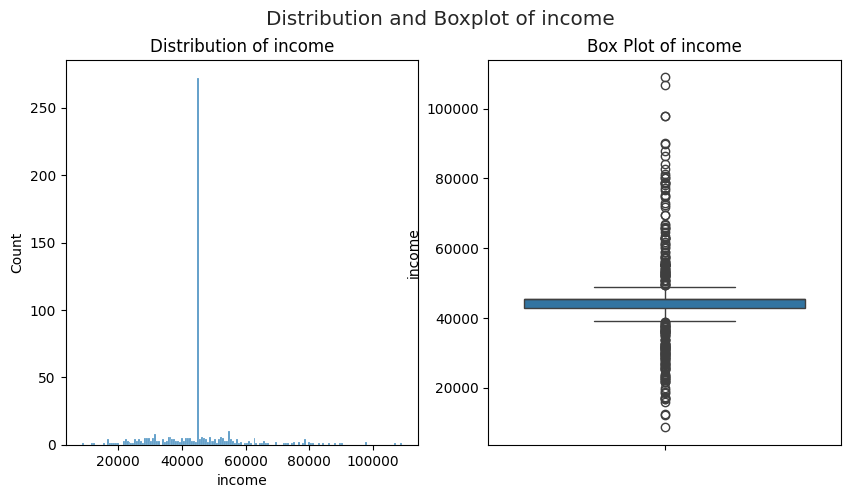

In [ ]:
for feature in ['income']:
    plot_distribution_and_boxplot(feature)

In [ ]:
print(imputed_grouped['income'].value_counts())

income
55080.000000    8
33772.000000    3
78704.000000    3
49409.000000    2
30038.000000    2
               ..
45285.592436    1
45285.591050    1
47997.000000    1
45285.590038    1
45285.786266    1
Name: count, Length: 531, dtype: int64


In [ ]:
grouped_match = cleanedData_01[['iid','pid','match','samerace','imprace','dec']].drop_duplicates()
print(grouped_match.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8368 entries, 0 to 8377
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid       8368 non-null   int64  
 1   pid       8368 non-null   float64
 2   match     8368 non-null   int64  
 3   samerace  8368 non-null   int64  
 4   imprace   8289 non-null   float64
 5   dec       8368 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 457.6 KB
None


In [ ]:
# Create an instance of IterativeImputer
imputer = IterativeImputer(max_iter=50, random_state=123)

# Fit the imputer on your data and transform it
data_imputed = imputer.fit_transform(grouped_match)
imputed_grouped_match = pd.DataFrame(data_imputed, columns=grouped_match.columns)

# Check if there are any missing values remaining after imputation
print("Remaining missing values after imputation:")
print(imputed_grouped_match.isnull().sum())

Remaining missing values after imputation:
iid         0
pid         0
match       0
samerace    0
imprace     0
dec         0
dtype: int64


In [ ]:
imputed_grouped_match.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid       8368 non-null   float64
 1   pid       8368 non-null   float64
 2   match     8368 non-null   float64
 3   samerace  8368 non-null   float64
 4   imprace   8368 non-null   float64
 5   dec       8368 non-null   float64
dtypes: float64(6)
memory usage: 392.4 KB


In [ ]:
cleanedData_02 = pd.merge(imputed_grouped_match, imputed_grouped, on='iid', how='left', suffixes=('', ''))
cleanedData_02 = pd.merge(cleanedData_02, imputed_grouped, left_on='pid', right_on='iid', how='left', suffixes=('', '_o'))

In [ ]:
cleanedData_02.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 65 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   iid         8368 non-null   float64
 1   pid         8368 non-null   float64
 2   match       8368 non-null   float64
 3   samerace    8368 non-null   float64
 4   imprace     8368 non-null   float64
 5   dec         8368 non-null   float64
 6   income      8368 non-null   float64
 7   age         8368 non-null   float64
 8   attr3_1     8368 non-null   float64
 9   sinc3_1     8368 non-null   float64
 10  intel3_1    8368 non-null   float64
 11  fun3_1      8368 non-null   float64
 12  amb3_1      8368 non-null   float64
 13  sports      8368 non-null   float64
 14  tvsports    8368 non-null   float64
 15  exercise    8368 non-null   float64
 16  dining      8368 non-null   float64
 17  museums     8368 non-null   float64
 18  art         8368 non-null   float64
 19  hiking      8368 non-null  

In [ ]:
def if_same(objectColumn, partnerColumn, newColumn):
    cleanedData_02[newColumn] = cleanedData_02[objectColumn] == cleanedData_02[partnerColumn]
    cleanedData_02[newColumn] = cleanedData_02[newColumn].astype(int)
newColumnList = ['sameField','sameRegion','sameCareer','sameUndergra']
objectColumnList = ['field_cd','from','career_c','undergra']
partnerColumnList = ['field_cd_o', 'from_o', 'career_c_o', 'undergra_o']
for objectColumn, partnerColumn, newColumn in zip(objectColumnList, partnerColumnList, newColumnList):
    if_same(objectColumn, partnerColumn, newColumn)
dropColumnList = ['field_cd','from','undergra', 'field_cd_o', 'from_o', 'undergra_o']
cleanedData_02.drop(columns=dropColumnList, inplace=True)

def difference(objectColumn, partnerColumn, newColumn):
    cleanedData_02[newColumn] = abs(cleanedData_02[objectColumn] - cleanedData_02[partnerColumn])
objectColumnList = ['age', 'income','attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1','amb3_1', 'sports'
                    ,'tvsports','exercise','dining'
                    ,'museums','art','hiking','gaming','clubbing','reading','tv','theater'
                    ,'movies','concerts','music','shopping','yoga']
partnerColumnList = ['age_o', 'income_o','attr3_1_o', 'sinc3_1_o', 'intel3_1_o', 'fun3_1_o','amb3_1_o', 'sports_o'
                    ,'tvsports_o','exercise_o','dining_o'
                    ,'museums_o','art_o','hiking_o','gaming_o','clubbing_o','reading_o','tv_o','theater_o'
                    ,'movies_o','concerts_o','music_o','shopping_o','yoga_o']
newColumnList = ['diffAge','diffIncome','diffAttr', 'diffSinc', 'diffIntel', 'diffFun','diffAmb', 'diffSports'
                ,'diffTvsports','diffExercise','diffDining'
                ,'diffMuseums','diffArt','diffHiking','diffGaming','diffClubbing','diffReading','diffTv','diffTheater'
                ,'diffMovies','diffConcerts','diffMusic','diffShopping','diffYoga']
for objectColumn, partnerColumn, newColumn in zip(objectColumnList, partnerColumnList, newColumnList):
    difference(objectColumn, partnerColumn, newColumn)
dropColumnList = ['sports','tvsports','exercise','dining'
                  ,'museums','art','hiking','gaming','clubbing','reading','tv','theater'
                  ,'movies','concerts','music','shopping','yoga'
                  ,'sports_o','tvsports_o','exercise_o','dining_o'
                  ,'museums_o','art_o','hiking_o','gaming_o','clubbing_o','reading_o','tv_o','theater_o'
                  ,'movies_o','concerts_o','music_o','shopping_o','yoga_o']
cleanedData_02.drop(columns=dropColumnList, inplace=True)

cleanedData_02['weightedSameRace'] = cleanedData_02['samerace'] * cleanedData_02['imprace']
cleanedData_02.drop(columns=['samerace','imprace','iid', 'pid','iid_o'], inplace=True)

In [ ]:
cleanedData_02.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match             8368 non-null   float64
 1   dec               8368 non-null   float64
 2   income            8368 non-null   float64
 3   age               8368 non-null   float64
 4   attr3_1           8368 non-null   float64
 5   sinc3_1           8368 non-null   float64
 6   intel3_1          8368 non-null   float64
 7   fun3_1            8368 non-null   float64
 8   amb3_1            8368 non-null   float64
 9   gender            8368 non-null   int64  
 10  career_c          8368 non-null   int64  
 11  income_o          8368 non-null   float64
 12  age_o             8368 non-null   float64
 13  attr3_1_o         8368 non-null   float64
 14  sinc3_1_o         8368 non-null   float64
 15  intel3_1_o        8368 non-null   float64
 16  fun3_1_o          8368 non-null   float64


In [ ]:
cleanedData_03 = cleanedData_02.drop('dec', axis=1)

In [ ]:
cleanedData_04 = cleanedData_02.drop('match', axis=1)
cleanedData_04.to_csv(dirname + 'cleanedData_03.csv', index=False)
cleanedData_04.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dec               8368 non-null   float64
 1   income            8368 non-null   float64
 2   age               8368 non-null   float64
 3   attr3_1           8368 non-null   float64
 4   sinc3_1           8368 non-null   float64
 5   intel3_1          8368 non-null   float64
 6   fun3_1            8368 non-null   float64
 7   amb3_1            8368 non-null   float64
 8   gender            8368 non-null   int64  
 9   career_c          8368 non-null   int64  
 10  income_o          8368 non-null   float64
 11  age_o             8368 non-null   float64
 12  attr3_1_o         8368 non-null   float64
 13  sinc3_1_o         8368 non-null   float64
 14  intel3_1_o        8368 non-null   float64
 15  fun3_1_o          8368 non-null   float64
 16  amb3_1_o          8368 non-null   float64


In [ ]:
cleanedData_03.to_csv(dirname + 'cleanedData_02.csv', index=False)

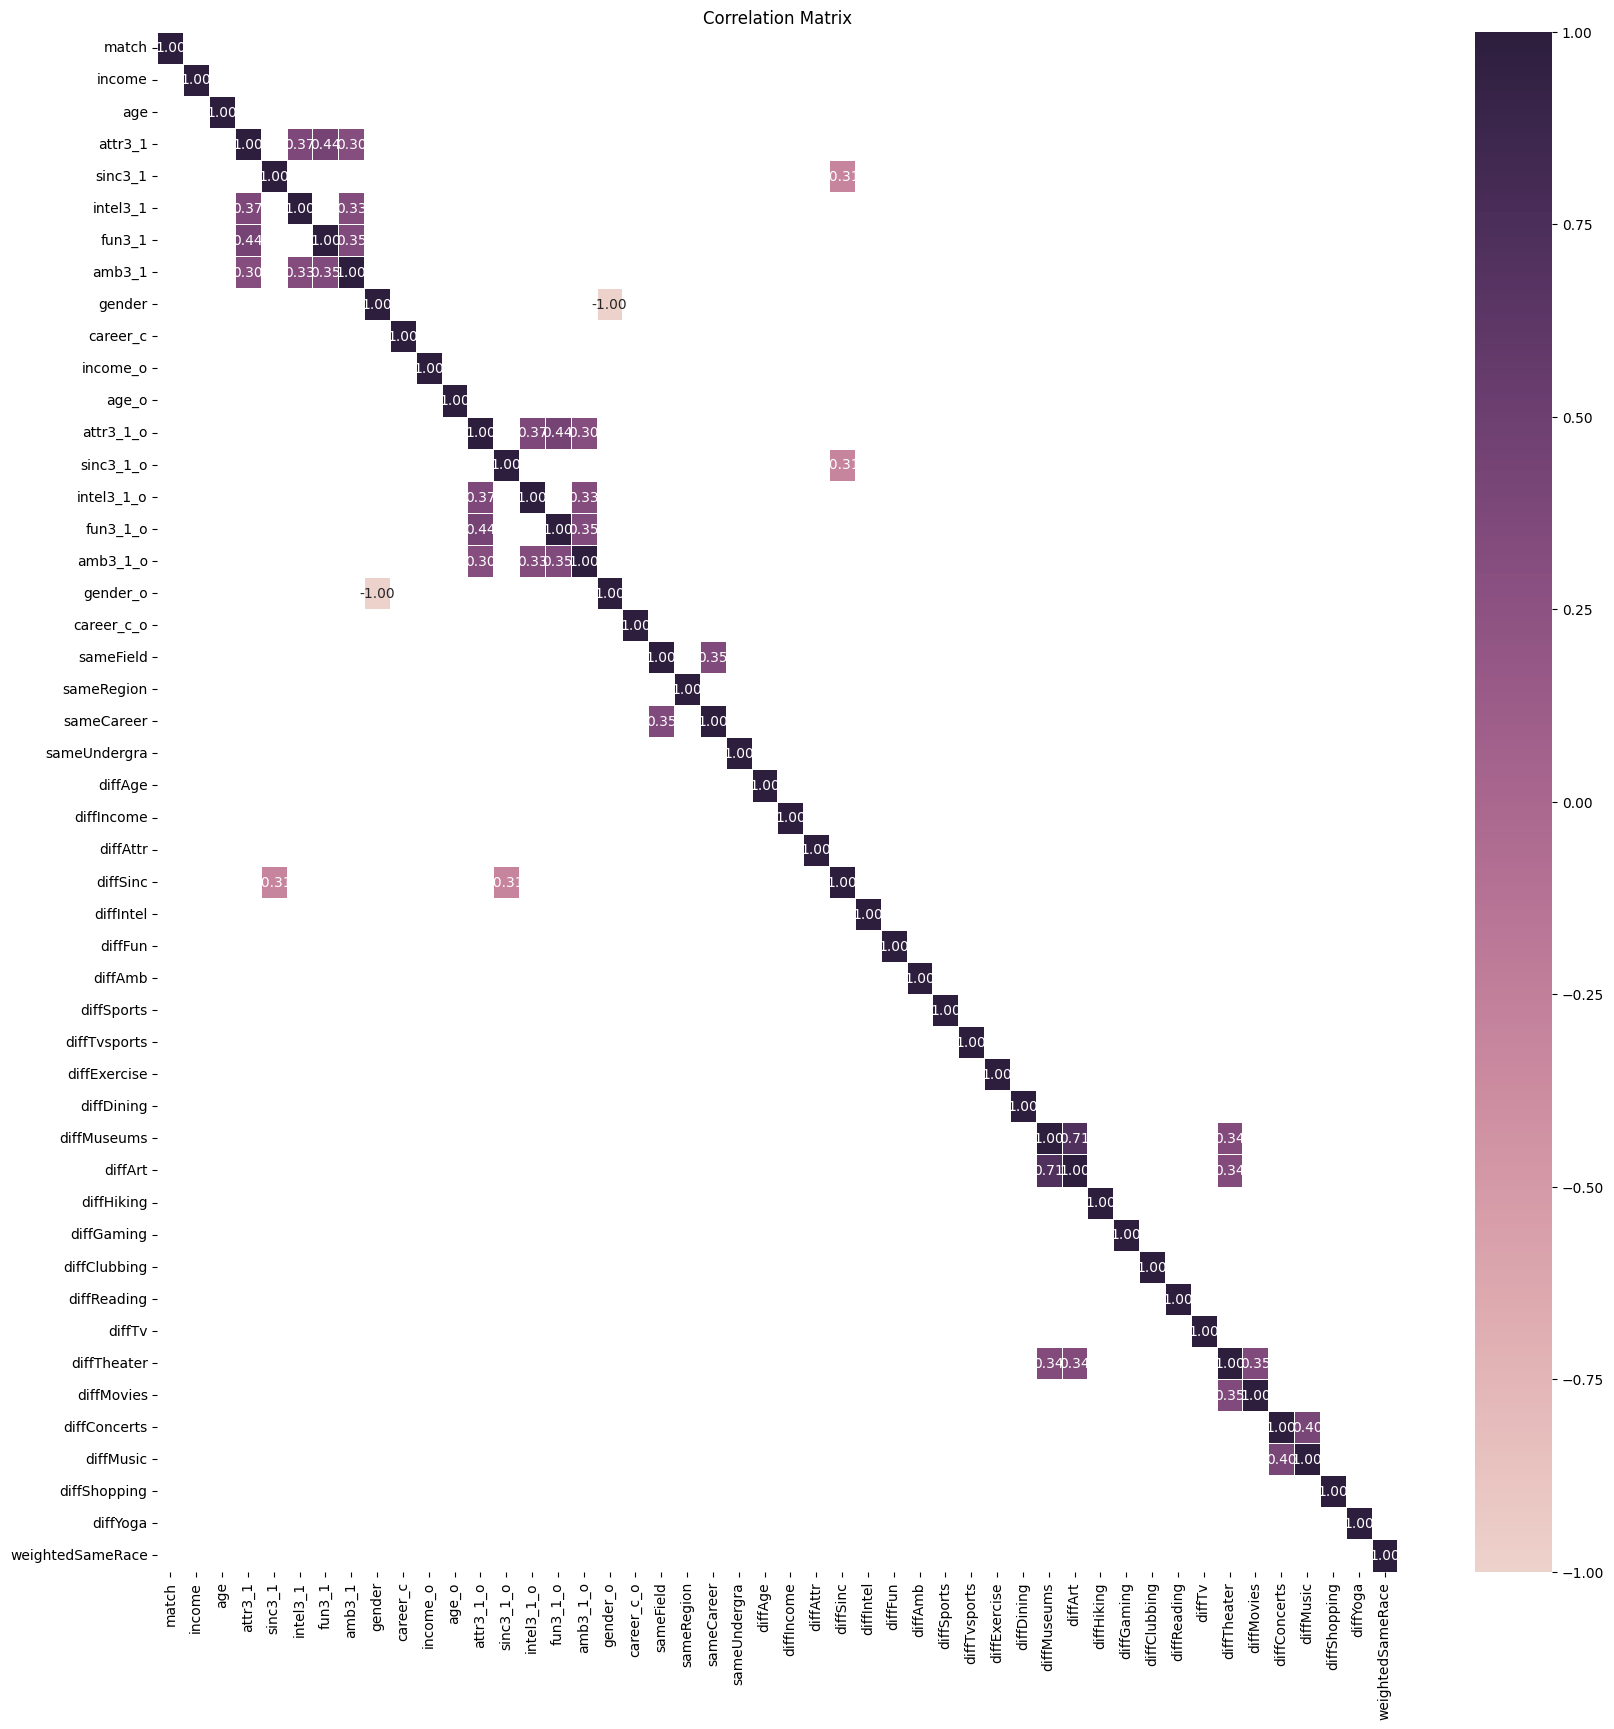

In [ ]:
correlation_matrix = cleanedData_03.corr()
mask = np.where(abs(correlation_matrix) < 0.3, True, False)

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap=sns.cubehelix_palette(as_cmap=True), annot=True, fmt=".2f", linewidths=0.5, mask=mask)

plt.title('Correlation Matrix')
plt.show()

In [ ]:
train, val = train_test_split(cleanedData_02, stratify=cleanedData_02['match'], random_state=123, test_size=0.5)
val, test = train_test_split(val, stratify=val['match'], random_state=123, test_size=0.5)
print(train.shape, val.shape, test.shape)

(4184, 48) (2092, 48) (2092, 48)


In [ ]:
train.to_csv(dirname + 'train.csv', index=False)
val.to_csv(dirname + 'val.csv', index=False)
test.to_csv(dirname + 'test.csv', index=False)